## Author# Ganesh Kale
## Project Milestone# 4
## Date# Nov 5, 2021

### Project Overview:

Project Overview:
House Prices in USA are booming, and house prices will continue to race ahead, at nearly twice the pace predicted before this year. This is what we hear or read when talk about housing market in USA. Buying house is very critical job, one should be aware of lots of things before buying house and when buying house nobody sure about when is the right time to buy house and wants to have some tool that would consider all the factors determining house price and predict the house price. Predicting the house price is challenging but doable and with help of machine learning algorithms this can be achieved.

This is the topic chosen for the final project to make data ready by collecting from different sources and cleaning, transforming, and merging all these data to make it final dataset in the ready format for machine learning algorithms so predicting house price model can be developed by training and validating on housing market dataset.
To build predicting house price model, we should consider different factors such as house information, and facilities available in neighborhood such school, hospitals etc.
As part of this exercise, Austin, Texas housing market data will be collected from 3 difference sources such as csv file with house related information, json file for hospital in neighborhood and tabular data for school information from website.

3. *Json File* – The neighborhood public health locations information is pulled from data.gov using API. The data is in json format, and it will have public health locations information such as facility name, address, hours of operation, website etc. Data dictionary has all the detailed information about this dataset. 

Link to data set – 

https://catalog.data.gov/dataset/austin-public-health-locations

### Json File – Public Health Information:

This data set is pulled using api from data.gov and it will have below information:

1. Facility Name – Name of health facility 
2. street_name – Street address of facility
3. City
4. State
5. Zip Code – Zip code of facility
6. Hours – Hours of operations of facility
7. Website – Website of the facility
8. Phone Number – Phone Number of the facility
9. Building ID – Facility building identifier
10. Ownership Status – The facility is leased or rented etc.
11. Owner – Owner of the facility
12. Occupying division – Kind of facility such community service or disease prevention etc
13. Occupancy Type – Facility is clinic or hospital etc
14. Area - Area of facility
15. Year Built – What year facility was built.
16. lat - latitude of location
17. long - longitude of location

#### _import required packages_

In [1]:
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import random   # for generating random numbers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import packages required for webscraping

import requests
from bs4 import BeautifulSoup
from requests.auth import HTTPBasicAuth

In [2]:
# get the key and tokens needed to access twitter data by running notebook where all keys are stored

%run ./twitter_keys.ipynb

In [3]:
# data source file path, this is open licence data set so key is not required

base_url = "https://data.austintexas.gov/api/views/6v78-dj3u/rows.json?accessType=DOWNLOAD"
base_url

'https://data.austintexas.gov/api/views/6v78-dj3u/rows.json?accessType=DOWNLOAD'

In [4]:
 # get the json formatted data loaded to response variable
    
response = requests.get(base_url).json()

In [5]:
# get the headers/columns of data

headers = response['meta']['view']['columns']

columns = []   # list to staore columnnames

# iterate thru headers list and get values iwth key -name

for col in headers:
    columns.append(col['name'])
    
# display column names
columns

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'Facility Name',
 'Street Address',
 'Zip Code',
 'Hours',
 'Website',
 'Phone Number',
 'Other Phone',
 'Building ID',
 'Ownership Status',
 'Owner',
 'Occupying Division',
 'Occupancy Type',
 'Sq. Ft. ',
 'Year Built ',
 'Single Member Council Districts',
 'Boundaries: Zip Code Tabulation Areas, 2017',
 'BOUNDARIES_single_member_districts',
 'Neighborhood Planning Areas',
 'Community Registry',
 'Zipcodes',
 'Zip Codes',
 'Zoning Review Cases_data']

In [6]:
# get the data from the response

data = response['data']

In [7]:
# create data frame 

austin_health_loc = pd.DataFrame(data=data, columns=columns)

In [8]:
# display shape and head of new school data frame

austin_health_loc.shape
austin_health_loc.head()

(32, 30)

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Facility Name,Street Address,...,Sq. Ft.,Year Built,Single Member Council Districts,"Boundaries: Zip Code Tabulation Areas, 2017",BOUNDARIES_single_member_districts,Neighborhood Planning Areas,Community Registry,Zipcodes,Zip Codes,Zoning Review Cases_data
0,row-9rcs~hagx_ij4a,00000000-0000-0000-7775-951E0F3DD617,0,1569615426,None,1569615427,None,{ },Bastrop WIC Clinic,"[{""address"": ""443 Texas Highway 71"", ""city"": ""...",...,1400,N/A,None,None,None,None,None,56,20320,None
1,row-c77s.qiv9-eq5z,00000000-0000-0000-8E95-17F5A9BD81D4,0,1569615426,None,1569615427,None,{ },Blackland Neighborhood Center,"[{""address"": ""2005 Salina St"", ""city"": ""Austin...",...,347,1984,1,11,8,27,309,74,2865,1169
2,row-nna7~xzkk~huih,00000000-0000-0000-9052-B968E577A5D4,0,1569615426,None,1569615427,None,{ },Clarksville Community Health Center,"[{""address"": ""1000 Toyath Street"", ""city"": ""Au...",...,3500,N/A,9,26,10,72,126,69,2858,442
3,row-xxuz.ct79.bx7i,00000000-0000-0000-0BC7-A00BBB9D75E9,0,1569615426,None,1569615427,None,{ },Del Valle WIC Clinic,"[{""address"": ""3518 FM 973"", ""city"": ""Del Valle...",...,1000,N/A,None,45,None,None,484,45,8002,None
4,row-ubqs.tdv2.k72g,00000000-0000-0000-D34A-3975CBB20ADB,0,1569615426,None,1569615427,None,{ },East Austin Neighborhood Center,"[{""address"": ""211 Comal St"", ""city"": ""Austin"",...",...,4304,1981,3,7,3,35,309,1,2857,553


## Data Cleaning and Transformation

### 1. Update Headers

The data collected for Austin public health facilities have too many features we do not need them so remove unwanted features

In [9]:
# display all columns

austin_health_loc.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'Facility Name', 'Street Address', 'Zip Code',
       'Hours', 'Website', 'Phone Number', 'Other Phone', 'Building ID',
       'Ownership Status', 'Owner', 'Occupying Division', 'Occupancy Type',
       'Sq. Ft. ', 'Year Built ', 'Single Member Council Districts',
       'Boundaries: Zip Code Tabulation Areas, 2017',
       'BOUNDARIES_single_member_districts', 'Neighborhood Planning Areas',
       'Community Registry', 'Zipcodes', 'Zip Codes',
       'Zoning Review Cases_data'],
      dtype='object')

In [10]:
# remove unwanted headers and keep only required ones

new_cols = ['Facility Name', 'Street Address', 'Zip Code',
       'Hours', 'Website', 'Phone Number', 'Other Phone', 'Building ID',
       'Ownership Status', 'Owner', 'Occupying Division', 'Occupancy Type',
       'Sq. Ft. ', 'Year Built ']
new_cols

['Facility Name',
 'Street Address',
 'Zip Code',
 'Hours',
 'Website',
 'Phone Number',
 'Other Phone',
 'Building ID',
 'Ownership Status',
 'Owner',
 'Occupying Division',
 'Occupancy Type',
 'Sq. Ft. ',
 'Year Built ']

In [11]:
# update health facility data set based on new columns

austin_health_loc = austin_health_loc[new_cols]

# display shape and head of new health locations data frame

austin_health_loc.shape
austin_health_loc.head()

(32, 14)

,Facility Name,Street Address,Zip Code,Hours,Website,Phone Number,Other Phone,Building ID,Ownership Status,Owner,Occupying Division,Occupancy Type,Sq. Ft.,Year Built
0,Bastrop WIC Clinic,"[{""address"": ""443 Texas Highway 71"", ""city"": ""...",78602,"Monday 7:30am to 7pm, closed 12 noon to 1pm; T...",None,512-972-4942,None,BAS,Lease,The Marketplace at Bastrop,Community Services,Clinic,1400,N/A
1,Blackland Neighborhood Center,"[{""address"": ""2005 Salina St"", ""city"": ""Austin...",78722,Monday to Thursday 8am to 6pm; Friday 8am to 1...,None,512-972-5790,None,BNC,Own,City of Austin,Community Services,"Neighborhood Center, Offices",347,1984
2,Clarksville Community Health Center,"[{""address"": ""1000 Toyath Street"", ""city"": ""Au...",78703,"Monday to Friday, 8am - 4:30pm",[http://www.austintexas.gov/department/clarksv...,None,None,CNC,Own,City of Austin,Disease Prevnetion and Health Promotion,"Clinic, Offices",3500,N/A
3,Del Valle WIC Clinic,"[{""address"": ""3518 FM 973"", ""city"": ""Del Valle...",78617,Monday 8am to 7pm; closed 12 noon to 12:30pm; ...,[http://www.austintexas.gov/department/del-val...,512-972-4942,None,DEL,N/A,Travis County,Community Services,Clinic,1000,N/A
4,East Austin Neighborhood Center,"[{""address"": ""211 Comal St"", ""city"": ""Austin"",...",78702,Monday toThursday 8am to 6pm; Friday 8am to noon,[http://www.austintexas.gov/department/east-au...,512-972-6650,None,EAN,Own,City of Austin,Community Services,"Clinic, Neighborhood Center",4304,1981


### 2. Handle Missing Data

In [12]:
# identify missing values

austin_health_loc.isna().sum()

Facility Name          0
Street Address         0
Zip Code               0
Hours                  5
Website                8
Phone Number           2
Other Phone           31
Building ID            2
Ownership Status       1
Owner                  1
Occupying Division     1
Occupancy Type         1
Sq. Ft.                2
Year Built             1
dtype: int64

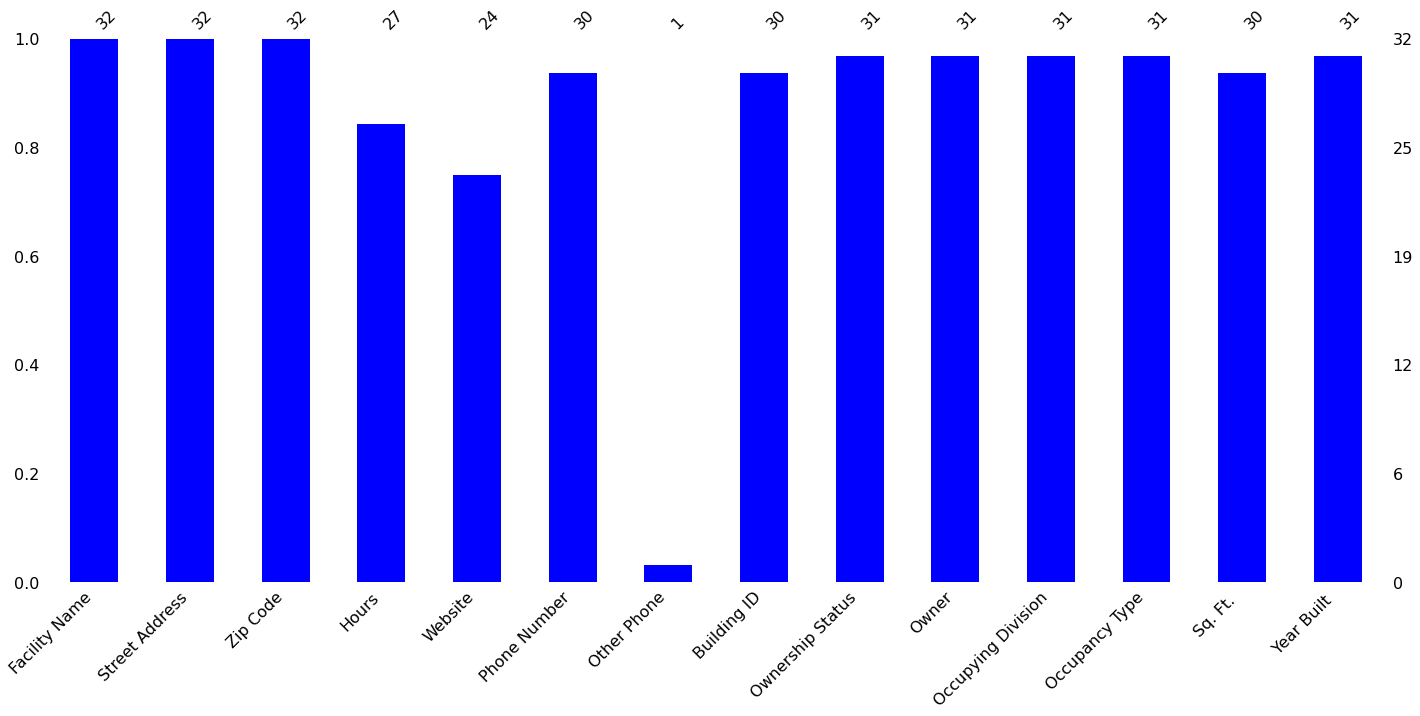

In [13]:
# display missing values

import missingno as msno

msno.bar(austin_health_loc, color='b');

# it seems there are no missing values

In [14]:
# it seems 'Other phone' feature have most blank values

austin_health_loc['Other Phone'].isna().sum()

31

In [15]:
# drop column "Other Phone" sinceit has only blank value

austin_health_loc.drop('Other Phone',inplace=True,axis=1)

In [16]:
# fill na for rest of the columns with padding

austin_health_loc.fillna(method='bfill',axis=0,inplace=True)

In [17]:
# display austin_health_loc df head after droping column and filling na values

austin_health_loc.head(2)

,Facility Name,Street Address,Zip Code,Hours,Website,Phone Number,Building ID,Ownership Status,Owner,Occupying Division,Occupancy Type,Sq. Ft.,Year Built
0,Bastrop WIC Clinic,"[{""address"": ""443 Texas Highway 71"", ""city"": ""...",78602,"Monday 7:30am to 7pm, closed 12 noon to 1pm; T...",[http://www.austintexas.gov/department/clarksv...,512-972-4942,BAS,Lease,The Marketplace at Bastrop,Community Services,Clinic,1400,N/A
1,Blackland Neighborhood Center,"[{""address"": ""2005 Salina St"", ""city"": ""Austin...",78722,Monday to Thursday 8am to 6pm; Friday 8am to 1...,[http://www.austintexas.gov/department/clarksv...,512-972-5790,BNC,Own,City of Austin,Community Services,"Neighborhood Center, Offices",347,1984


### 3. Feature Engineering/Transform Features:

In [18]:
# the dataset has 'street address' column where it is address in list and dictionary format, 
#  split this column to create street address, city name, state, latitude and longitude etc seprate columns.

# create function to clean address column and create new columns
from ast import literal_eval

def split_address(addr_list):
    
    new_cols = []
    address = literal_eval(addr_list[0])
    new_cols.append(address['address'])
    new_cols.append(address['city'])
    new_cols.append(address['state'])
    new_cols.append(addr_list[1])
    new_cols.append(addr_list[2])
    return new_cols

new_columns = ['street_name','city','state','lat','long']

In [19]:
# iterate over function to create new columns based on street address feature

values = []
for i in range(austin_health_loc.shape[0]):
    values.append(split_address(austin_health_loc['Street Address'][i]))
    
austin_health_loc[new_columns] = values

In [20]:
# drop the stree address column

austin_health_loc.drop('Street Address',inplace=True,axis=1)

In [21]:
# display head of df after addingnew cols

austin_health_loc.head()

,Facility Name,Zip Code,Hours,Website,Phone Number,Building ID,Ownership Status,Owner,Occupying Division,Occupancy Type,Sq. Ft.,Year Built,street_name,city,state,lat,long
0,Bastrop WIC Clinic,78602,"Monday 7:30am to 7pm, closed 12 noon to 1pm; T...",[http://www.austintexas.gov/department/clarksv...,512-972-4942,BAS,Lease,The Marketplace at Bastrop,Community Services,Clinic,1400,N/A,443 Texas Highway 71,Bastrop,Texas,30.10646853400044,-97.33211573399967
1,Blackland Neighborhood Center,78722,Monday to Thursday 8am to 6pm; Friday 8am to 1...,[http://www.austintexas.gov/department/clarksv...,512-972-5790,BNC,Own,City of Austin,Community Services,"Neighborhood Center, Offices",347,1984,2005 Salina St,Austin,Texas,30.280750365000472,-97.72245940699969
2,Clarksville Community Health Center,78703,"Monday to Friday, 8am - 4:30pm",[http://www.austintexas.gov/department/clarksv...,512-972-4942,CNC,Own,City of Austin,Disease Prevnetion and Health Promotion,"Clinic, Offices",3500,N/A,1000 Toyath Street,Austin,Texas,30.28122053000044,-97.76330054699969
3,Del Valle WIC Clinic,78617,Monday 8am to 7pm; closed 12 noon to 12:30pm; ...,[http://www.austintexas.gov/department/del-val...,512-972-4942,DEL,N/A,Travis County,Community Services,Clinic,1000,N/A,3518 FM 973,Del Valle,Texas,30.198796,-97.642069
4,East Austin Neighborhood Center,78702,Monday toThursday 8am to 6pm; Friday 8am to noon,[http://www.austintexas.gov/department/east-au...,512-972-6650,EAN,Own,City of Austin,Community Services,"Clinic, Neighborhood Center",4304,1981,211 Comal St,Austin,Texas,30.259718,-97.727464


### 4. Duplicate Data

In [22]:
# check for any duplicate facility name and street name in dataset

dupes = austin_health_loc[['Facility Name','street_name']].duplicated().sum()

# there are no duplicates in data set

print(f"There are {dupes} duplicates in the dataset")

There are 0 duplicates in the dataset


Based on above dup count, there are no duplicates in the dataset, so we dont need to remove any

#### 5. Outliers and Bad Data

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Zip Code', ylabel='count'>

Text(0.5, 1.0, 'Distribution of: Zip Code')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '78602'),
  Text(1, 0, '78722'),
  Text(2, 0, '78703'),
  Text(3, 0, '78617'),
  Text(4, 0, '78702'),
  Text(5, 0, '78744'),
  Text(6, 0, '78621'),
  Text(7, 0, '78745'),
  Text(8, 0, '78653'),
  Text(9, 0, '78758'),
  Text(10, 0, '78741'),
  Text(11, 0, '78735'),
  Text(12, 0, '78660'),
  Text(13, 0, '78754'),
  Text(14, 0, '78704'),
  Text(15, 0, '78752'),
  Text(16, 0, '78751')])

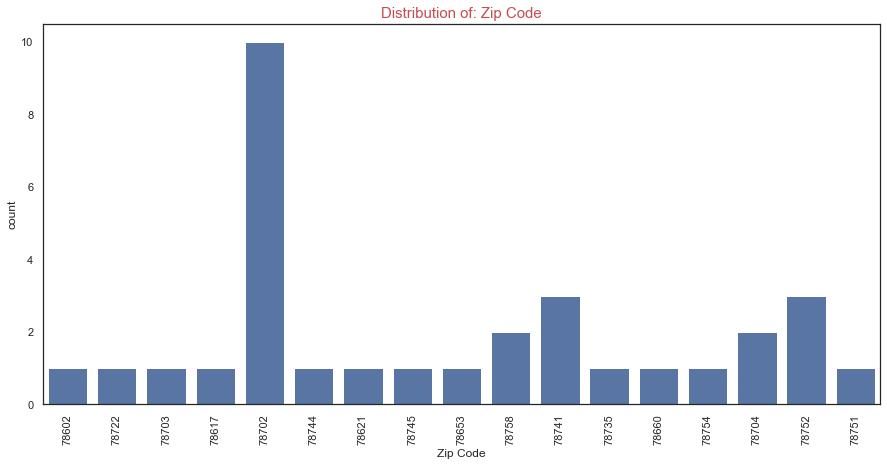

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Ownership Status', ylabel='count'>

Text(0.5, 1.0, 'Distribution of: Ownership Status')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Lease'),
  Text(1, 0, 'Own'),
  Text(2, 0, 'N/A'),
  Text(3, 0, 'Own ')])

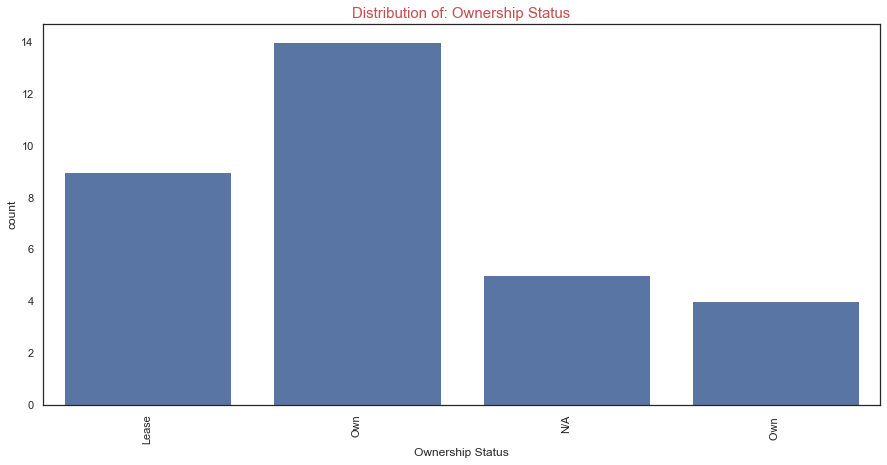

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Occupying Division', ylabel='count'>

Text(0.5, 1.0, 'Distribution of: Occupying Division')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Community Services '),
  Text(1, 0, 'Community Services'),
  Text(2, 0, 'Disease Prevnetion and Health Promotion'),
  Text(3, 0, 'Comunity Services, Disease Prevention and Health Promotion'),
  Text(4, 0, 'Administrative Support Services, Disease Prevnetion and Health Promotion, Epidemiology, Public Health Preparedness'),
  Text(5, 0, 'Environmental Health Services '),
  Text(6, 0, 'Epidemiology and Public Health Preparedness, Office of the Director'),
  Text(7, 0, 'Community Services, Health Equity and Community Engagement'),
  Text(8, 0, 'Administrative Support Services, Health Equity and Community Engagement, Office of the Director '),
  Text(9, 0, 'Administrative Support Services, Community Services, Health Equity and Community Engagement '),
  Text(10, 0, 'Community Services, Epidemiology, Public Health Preparedness ')])

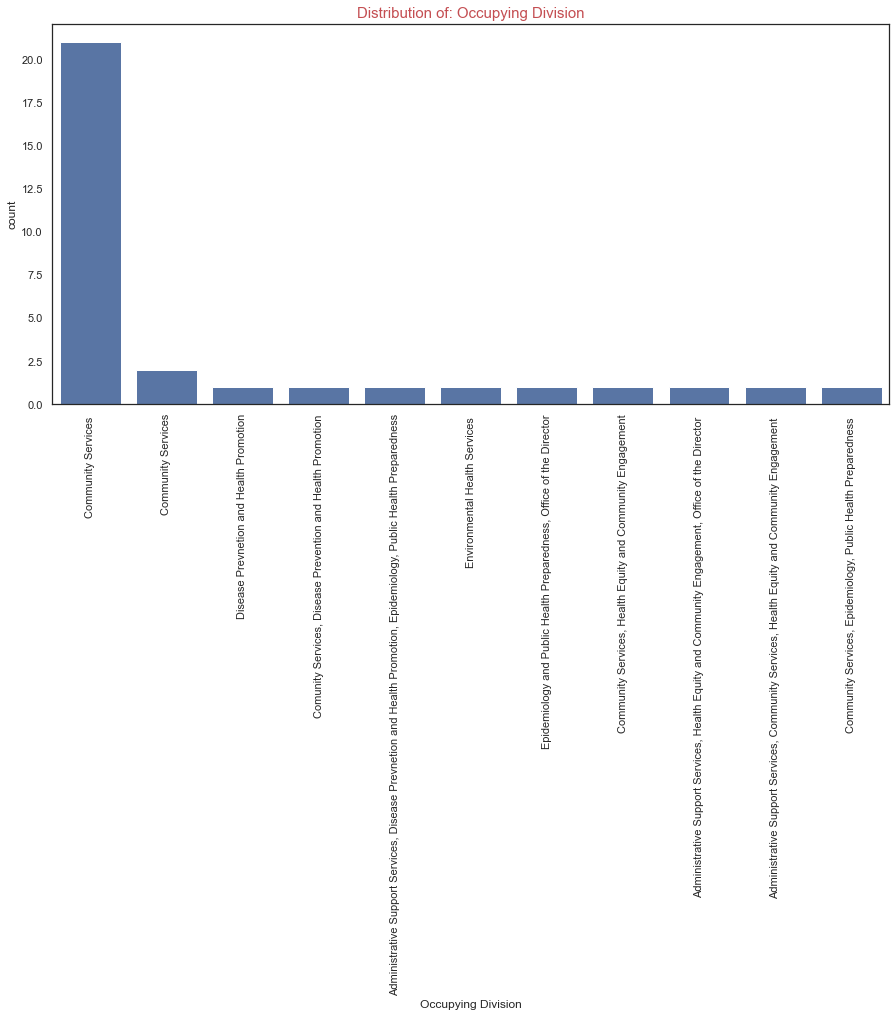

In [23]:
# display distribution chart for each feature and see if any outliers

column_data = austin_health_loc[['Zip Code','Ownership Status','Occupying Division']]

sns.set(style='white')


for col in column_data:
    plt.figure(figsize=(15,7))
    sns.countplot(data = austin_health_loc, x = col, color = 'b')
    plt.title(f'Distribution of: {col}', fontdict = {'color':'r','fontsize':15})
    plt.xticks(rotation = 90);
    plt.show();

#### Based on above charts we can see that zip code 78702 have lots of facilities, Ownership status feature have some not realted status such as phone number and two separate statuses with same name as 'own' could be extra space. We are going to keep all of these as is since we are going to encode them.

### 6. Format Data:

In [24]:
# encode columns required for final dataset and used in model building

format_cols = ['Hours','Occupying Division','Occupancy Type','lat','long']

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in format_cols:
    austin_health_loc[col] = enc.fit_transform(austin_health_loc[col])

In [25]:
# display head of df after addingnew cols

austin_health_loc.head()

,Facility Name,Zip Code,Hours,Website,Phone Number,Building ID,Ownership Status,Owner,Occupying Division,Occupancy Type,Sq. Ft.,Year Built,street_name,city,state,lat,long
0,Bastrop WIC Clinic,78602,1,[http://www.austintexas.gov/department/clarksv...,512-972-4942,BAS,Lease,The Marketplace at Bastrop,4,0,1400,N/A,443 Texas Highway 71,Bastrop,Texas,0,0
1,Blackland Neighborhood Center,78722,19,[http://www.austintexas.gov/department/clarksv...,512-972-5790,BNC,Own,City of Austin,3,6,347,1984,2005 Salina St,Austin,Texas,20,22
2,Clarksville Community Health Center,78703,15,[http://www.austintexas.gov/department/clarksv...,512-972-4942,CNC,Own,City of Austin,8,4,3500,N/A,1000 Toyath Street,Austin,Texas,21,28
3,Del Valle WIC Clinic,78617,3,[http://www.austintexas.gov/department/del-val...,512-972-4942,DEL,N/A,Travis County,4,1,1000,N/A,3518 FM 973,Del Valle,Texas,2,3
4,East Austin Neighborhood Center,78702,21,[http://www.austintexas.gov/department/east-au...,512-972-6650,EAN,Own,City of Austin,4,2,4304,1981,211 Comal St,Austin,Texas,16,24


# END